### Unstructured Data Analysis – Assignment 1

In [21]:
.libPaths("/home/rstudio/R/x86_64-pc-linux-gnu-library/3.4")

In [22]:
library(twitteR)
library(ggplot2)
library(plyr)
library(stringi)

In [23]:
api_key <- "IyevIv9zzOFBKfrz357oaBLwb"
api_secret <- "kAZwHSiILM52UeMUGGkVKmurnOz5WWnhGlDkrQKUwpqbW65giq"
token <- "3081687060-XgyCdpwMopQpFSpOZBAGNiS0JMusqLckz8FnkRm"
token_secret <- "3csgGhvqIHLQQAtoLtGMiirLAW9INcPfDFA7ofPbLN5h6"

In [24]:
setup_twitter_oauth(api_key, api_secret, token, token_secret)

[1] "Using direct authentication"


### Lets scrap datascience hastag

In [25]:
datascience <- searchTwitter('#DataScience',n = 500)
df.datascience <- twListToDF(datascience)

In [26]:
data_time <- as.data.frame(ldply(strsplit(as.character(df.datascience$created), " ")))
time <- as.data.frame(ldply(strsplit(as.character(data_time$V2), ":")))
df <- cbind(data_time, time)
colnames(df) <- c("Date", "Time", "Hr", "Min", "Sec")
df.datascience <- cbind(df.datascience, df)
hourly_tweet <- as.data.frame(table(df.datascience$Hr))
colnames(hourly_tweet) <- c("Hour", "Total_Tweets")

### a. Hour wise or minute wise (depending upon the scrapped tweets) number of tweets - draw a line chart

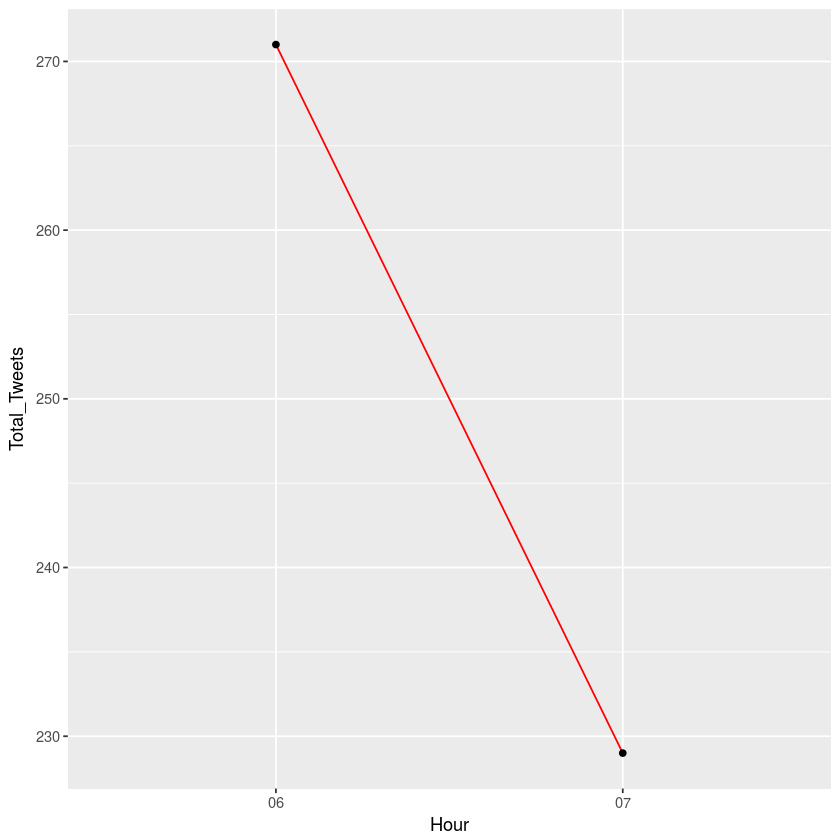

In [27]:
ggplot(data=hourly_tweet, aes(x=Hour, y=Total_Tweets, group=1)) + geom_line(color="red")+ geom_point()

### b. Top ten users with more number of tweets

In [28]:
top_tweets <- as.data.frame(table(df.datascience$screenName))
colnames(top_tweets) <- c("User", "Total_Tweets")
top10 <- head(top_tweets[order(-top_tweets$Total_Tweets),], 10)

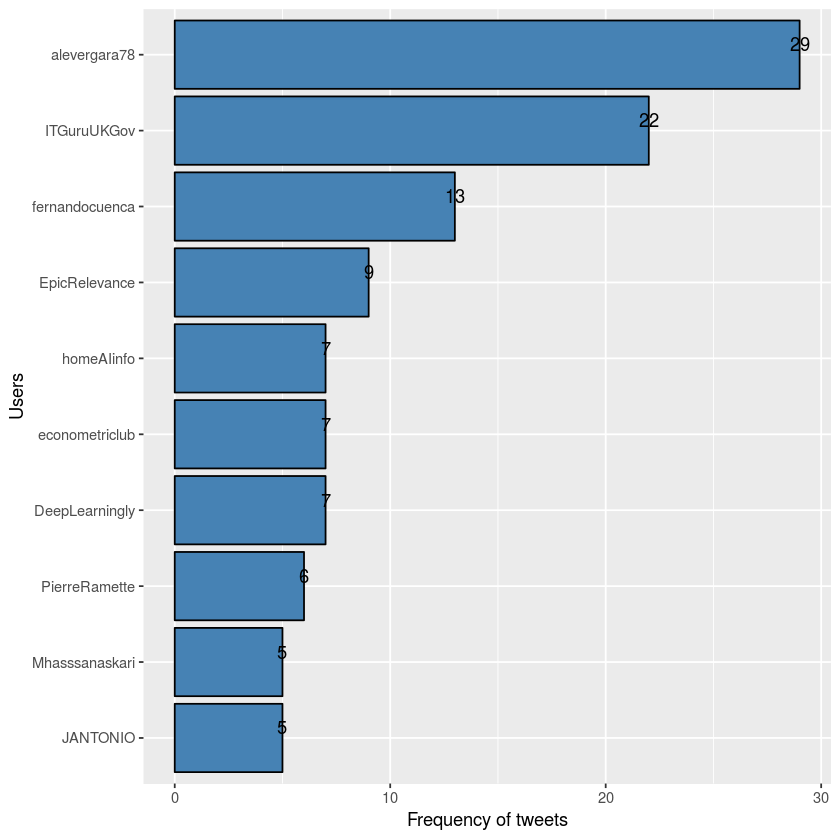

In [29]:
ggplot(data=top10, aes(x=reorder(User,Total_Tweets), y=Total_Tweets)) + geom_bar(stat="identity", color="black", fill="steelblue") + coord_flip() + geom_text(aes(label=Total_Tweets), position=position_dodge(width=0.9), vjust=-0.25) + labs(y="Frequency of tweets", x="Users")

### c. Create a new column in the data itself, to identify total number of hashtags in each tweet

In [30]:
df.datascience$Total_hashtags <- lapply(df.datascience$text, function(x){
    logicvect <- logical()
    splitx <- strsplit(x, " ")[[1]]
    for (i in 1:length(splitx)) {
        logicvect[i] <-  substring(splitx[i],1,1) == '#'
    }
    sum(logicvect)
})

### d. Identify those users who have used #datascience as well as #machinelearning. Plot a bar chart top 10 users based on their count

In [31]:
df.datascience$hashtag_count <- lapply(df.datascience$text, function(x){
    logicalvect <- logical()
    splitx <- strsplit(x, " ")[[1]]
    for (i in 1:length(splitx)) {
        if (splitx[i] == '#DataScience' || splitx[i] == '#MachineLearning') {
            logicalvect[i] <-  TRUE
        }
        else {
            logicalvect[i] <-  FALSE
        }
    }
    sum(logicalvect)
})

In [32]:
hashtag_tweets <- df.datascience[, c("screenName", "hashtag_count")]
hashtag_tweets$hashtag_count <- as.numeric(hashtag_tweets$hashtag_count)

In [33]:
hashtag_freq <- as.data.frame(tapply(hashtag_tweets$hashtag_count, hashtag_tweets$screenName, FUN=sum))
hashtag_freq$User <- row.names(hashtag_freq)
row.names(hashtag_freq) <- NULL
colnames(hashtag_freq) <- c("Total_Hashtages", "User")
hashtag_freq <- hashtag_freq[order(-hashtag_freq$Total_Hashtages),]
head(hashtag_freq, 10)

,Total_Hashtages,User
15,31,alevergara78
153,20,ITGuruUKGov
109,18,EpicRelevance
122,14,fernandocuenca
90,12,DeepLearningly
158,10,JANTONIO
278,10,SecurityNews6
136,8,homeAIinfo
103,7,econometriclub
213,6,MeeTMercurio


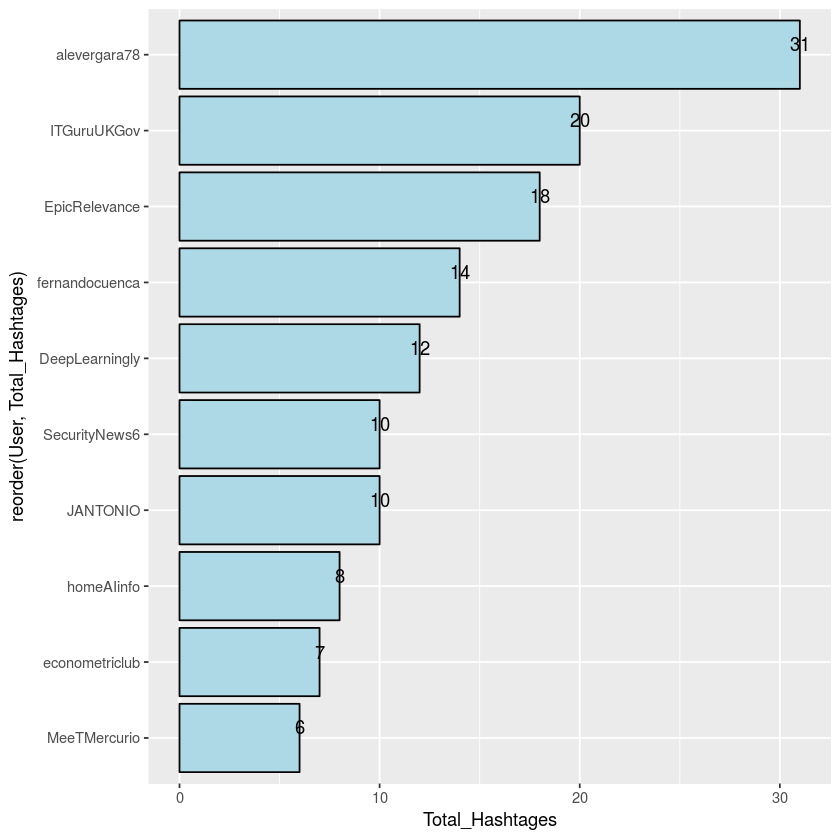

In [34]:
ggplot(data=head(hashtag_freq,10), aes(x=reorder(User,Total_Hashtages), y=Total_Hashtages)) + geom_bar(stat="identity", color="black", fill="lightblue") + coord_flip() + geom_text(aes(label=Total_Hashtages), position=position_dodge(width=0.9), vjust=-0.25)